# EX2

In [48]:
require("faraway")
head("uswages")
summary(uswages)
uswages$exper[uswages$exper <0] <-NA

# convert race, smsa, and pt to factor variables
uswages$race <- factor(uswages$race)
levels(uswages$race) <- c("White","Black")
uswages$smsa <- factor(uswages$smsa)
levels(uswages$smsa) <- c("No","Yes")
uswages$pt <- factor(uswages$pt)
levels(uswages$pt) <- c("No","Yes")

# create region, a factor variable based on the four regions ne, mw, so, we
uswages <- data.frame(uswages,
                      region =
                        1*uswages$ne +
                        2*uswages$mw +
                        3*uswages$so +
                        4*uswages$we)
uswages$region <- factor(uswages$region)
levels(uswages$region) <- c("ne","mw","so","we")

# delete the four regions ne, mw, so, we
uswages <- subset(uswages,select=-c(ne:we))


# Take care of NAs
uswages <- na.omit(uswages)

# Variable names
names(uswages)


[1] "uswages"

      wage              educ           exper          race       smsa     
 Min.   :  50.39   Min.   : 0.00   Min.   : 0.00   White:1812   No : 483  
 1st Qu.: 314.69   1st Qu.:12.00   1st Qu.: 8.00   Black: 155   Yes:1484  
 Median : 522.32   Median :12.00   Median :16.00                          
 Mean   : 613.99   Mean   :13.08   Mean   :18.74                          
 3rd Qu.: 783.48   3rd Qu.:16.00   3rd Qu.:27.00                          
 Max.   :7716.05   Max.   :18.00   Max.   :59.00                          
   pt       region  
 No :1802   ne:448  
 Yes: 165   mw:488  
            so:616  
            we:415  
                    
                    

ERROR: Error in data.frame(uswages, region = 1 * uswages$ne + 2 * uswages$mw + : arguments imply differing number of rows: 1967, 0


In [49]:
#find correlation between wage and region
g=lm(wage ~ region,data= uswages)
coef(g)

(Intercept)    regionmw    regionso    regionwe 
 641.717812  -48.027300  -56.902861    9.514236

In [50]:
m1 = lm(wage ~ region, data= uswages)

m2 = lm(wage ~region + educ + exper , data= uswages)
m3 = lm(wage ~ educ, data= uswages)

summary(m2)



Call:
lm(formula = wage ~ region + educ + exper, data = uswages)

Residuals:
   Min     1Q Median     3Q    Max 
-991.6 -235.5  -49.5  149.3 7264.9 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -228.3596    54.6719  -4.177 3.08e-05 ***
regionmw     -32.5997    27.9236  -1.167    0.243    
regionso     -27.6755    26.5297  -1.043    0.297    
regionwe      34.6088    29.0959   1.189    0.234    
educ          51.7280     3.3466  15.457  < 2e-16 ***
exper          9.3551     0.7607  12.298  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 426.3 on 1961 degrees of freedom
Multiple R-squared:  0.138,	Adjusted R-squared:  0.1358 
F-statistic: 62.77 on 5 and 1961 DF,  p-value: < 2.2e-16



Call:
lm(formula = wage ~ educ, data = uswages)

Residuals:
   Min     1Q Median     3Q    Max 
-759.6 -264.3  -72.5  169.7 7503.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   93.104     44.482   2.093   0.0365 *  
educ          39.828      3.314  12.016   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 442.8 on 1965 degrees of freedom
Multiple R-squared:  0.06845,	Adjusted R-squared:  0.06798 
F-statistic: 144.4 on 1 and 1965 DF,  p-value: < 2.2e-16


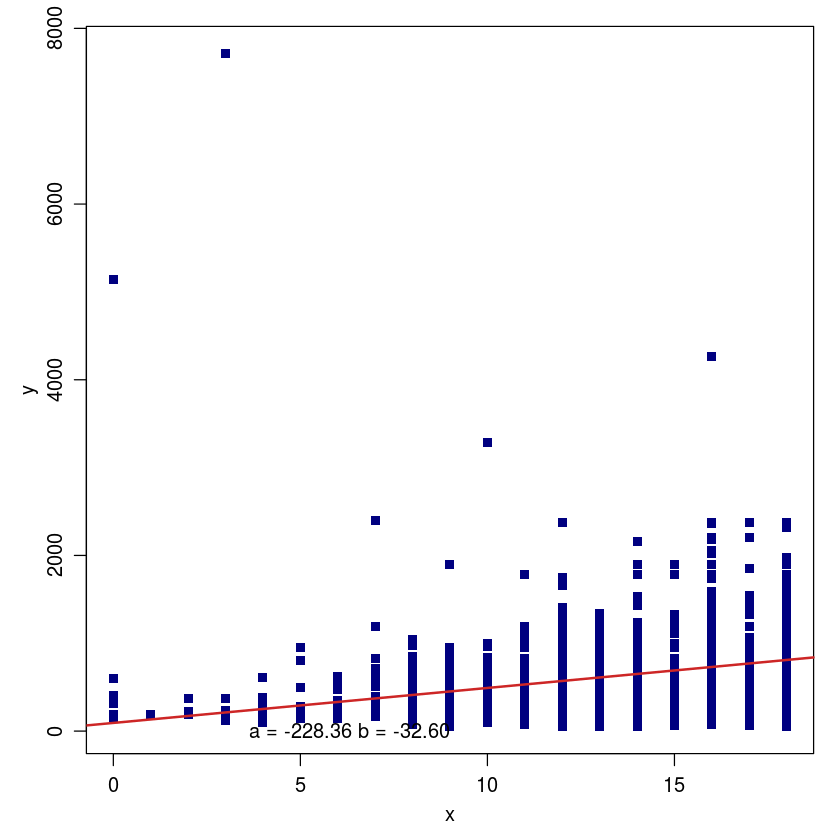

In [51]:
x = uswages$educ
y = uswages$wage
par(mfcol=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
plot(x, y, pch=15, col='navy',
     xlab='x', ylab='y')
abline(m3, col='firebrick3', lw=2)

a <- m2$coefficient[1]
b <- m2$coefficient[2]

text(9, 11.5, adj=1,
     paste("a =", sprintf("%.2f",a),
           "b =", sprintf("%.2f",b), sep=' '))

summary(m3)

# EX3

In [60]:
summary(sat)


     expend          ratio           salary          takers     
 Min.   :3.656   Min.   :13.80   Min.   :25.99   Min.   : 4.00  
 1st Qu.:4.882   1st Qu.:15.22   1st Qu.:30.98   1st Qu.: 9.00  
 Median :5.768   Median :16.60   Median :33.29   Median :28.00  
 Mean   :5.905   Mean   :16.86   Mean   :34.83   Mean   :35.24  
 3rd Qu.:6.434   3rd Qu.:17.57   3rd Qu.:38.55   3rd Qu.:63.00  
 Max.   :9.774   Max.   :24.30   Max.   :50.05   Max.   :81.00  
     verbal           math           total       
 Min.   :401.0   Min.   :443.0   Min.   : 844.0  
 1st Qu.:427.2   1st Qu.:474.8   1st Qu.: 897.2  
 Median :448.0   Median :497.5   Median : 945.5  
 Mean   :457.1   Mean   :508.8   Mean   : 965.9  
 3rd Qu.:490.2   3rd Qu.:539.5   3rd Qu.:1032.0  
 Max.   :516.0   Max.   :592.0   Max.   :1107.0  

In [62]:
sat <- na.omit(sat)

# Variable names
names(sat)

[1] "expend" "ratio"  "salary" "takers" "verbal" "math"   "total"

In [63]:
m4 =lm(math ~ verbal, data= sat)


In [68]:
#Math high scores are correlated with verbal high scores


Call:
lm(formula = salary ~ ratio, data = sat)

Residuals:
   Min     1Q Median     3Q    Max 
-8.842 -3.857 -1.541  3.724 15.209 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.879569   6.435002   5.420  1.9e-06 ***
ratio       -0.003004   0.378382  -0.008    0.994    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.003 on 48 degrees of freedom
Multiple R-squared:  1.314e-06,	Adjusted R-squared:  -0.02083 
F-statistic: 6.305e-05 on 1 and 48 DF,  p-value: 0.9937


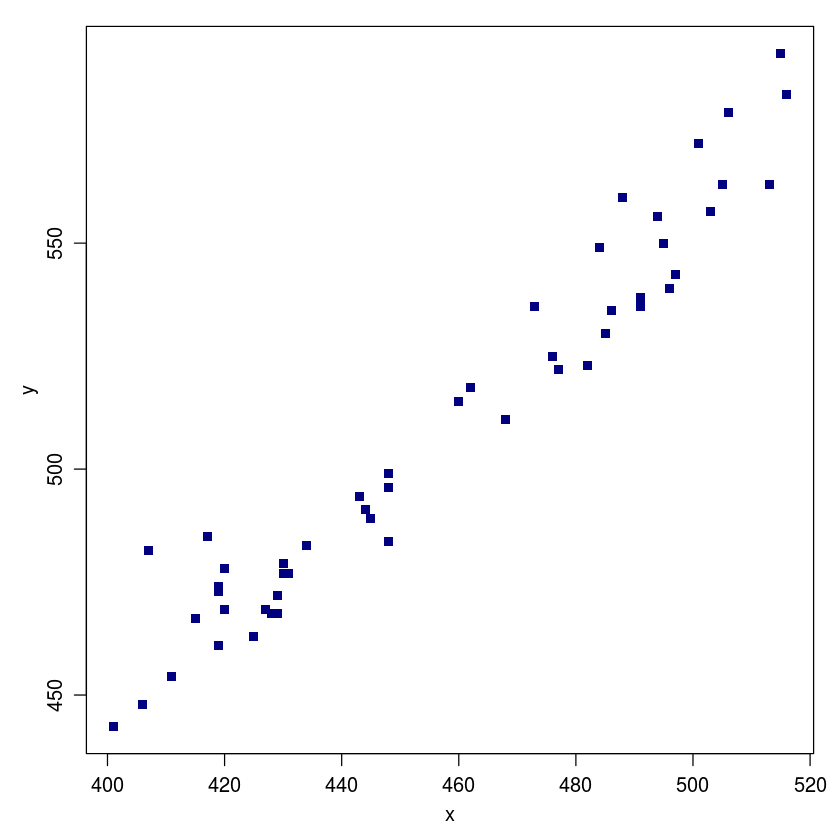

In [67]:
x = sat$verbal
y = sat$math
par(mfcol=c(1,1), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
plot(x, y, pch=15, col='navy',
     xlab='x', ylab='y')
abline(m4, col='firebrick3', lw=2)

a <- m4$coefficient[1]
b <- m4$coefficient[2]

text(9, 11.5, adj=1,
     paste("a =", sprintf("%.2f",a),
           "b =", sprintf("%.2f",b), sep=' '))

summary(m4)

# EX4

Choosing the same box you have a $ 2/3$ probability of getting a second gold ring. 

# EX5

In [3]:
f<- function(x,y,z)  y*x^2+z*log(y)+exp(x)

In [21]:
#1 sample mean
n = 1000000
x = runif(n,-1,1)
y = runif(n,3,6)
z = runif(n,0,2)
g= f(x,y,z)
integral = mean(g)*2*3*2
integral

[1] 49.94135

In [22]:
integrate(Vectorize(function(x) { 
    integrate(Vectorize(function(y) { 
        integrate(function(z) {  y*x^2+z*log(y)+exp(x) }, -1, 1)$value }), 3,6)$value }), 0,2)


110.3343 with absolute error < 1.2e-12

# EX 6

In [39]:
#area  under the curve bound by a triangle:
#plot triangle
x = c(1,0,-1)
y = c(0,1,0)
#plot(x,y, type = 'l')
y1 = function(x) exp(-(x+1)^2)
x1 = runif(100000,-1,1)
int = 2*mean(y1(x1))
int

[1] 0.8814886

# Ex 7

In [41]:
library('pracma')
#x is between 1/9 and 9
#y is between 1/3 and 3
g = function(x,y) exp(x)+cos(x*y)
integral2(g, 1/9,9,1/3,3)

$Q
[1] 21604.68

$error
[1] 1.05953e-08

In [48]:
u1 = runif(10000000,1/9,9)
u2 = runif(10000000,1/3,3)
d= 3-1/3
integral = mean(g(u1,u2))*d
integral

[1] 2428.752